<a href="https://colab.research.google.com/github/Yashthon/Pandas/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# II. Consider the following URL:
#https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
#Understand and implement the concepts and examples. Write your
#observations.

Pandas is a popular Python package for data science, and with good reason: it offers powerful, expressive and flexible data structures that make data manipulation and analysis easy, among many other things. The DataFrame is one of these structures.

**1 How to create pandas dataframe**

In [ ]:
import pandas as pd
import numpy as np
import re as re
import datetime
from datetime import datetime, date
from pandas.tseries.holiday import *
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = np.array([['','Col1','Col2'],
                ['Row1',1,2],
                ['Row2',3,4]])
                
print(pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:]))

     Col1 Col2
Row1    1    2
Row2    3    4


In [ ]:
# Take a 2D array as input to your DataFrame 
my_2darray = np.array([[1, 2, 3], [4, 5, 6]])
print(pd.DataFrame(my_2darray))

# Take a dictionary as input to your DataFrame 
my_dict = {1: ['1', '3'], 2: ['1', '2'], 3: ['2', '4']}
print(pd.DataFrame(my_dict))

# Take a DataFrame as input to your DataFrame 
my_df = pd.DataFrame(data=[4,5,6,7], index=range(0,4), columns=['A'])
print(pd.DataFrame(my_df))

# Take a Series as input to your DataFrame
my_series = pd.Series({"United Kingdom":"London", "India":"New Delhi", "United States":"Washington", "Belgium":"Brussels"})
print(pd.DataFrame(my_series))

   0  1  2
0  1  2  3
1  4  5  6
   1  2  3
0  1  1  2
1  3  2  4
   A
0  4
1  5
2  6
3  7
                         0
United Kingdom      London
India            New Delhi
United States   Washington
Belgium           Brussels


In [ ]:
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6]]))

# Use the `shape` property
print(df.shape)

# Or use the `len()` function with the `index` property
print(len(df.index))
print(df)

(2, 3)
2
   0  1  2
0  1  2  3
1  4  5  6


**2. How To Select an Index or Column From a Pandas DataFrame**

In [ ]:
array = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
index_values = [0, 1, 2]
column_values = ['A', 'B', 'C']
df = pd.DataFrame(data = array, index = index_values, columns = column_values)
print(df)

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


selecting columns from dataframe

In [ ]:
# Using `iloc[]`
print(df.iloc[0][0])

# Using `loc[]`
print(df.loc[0]['A'])

# Using `at[]`
print(df.at[0,'A'])

# Using `iat[]`
print(df.iat[0,0])

1
1
1
1


selecting rows from the dataframe

In [ ]:
# Use `iloc[]` to select row `0`
print(df.iloc[0])

# Use `loc[]` to select column `'A'`
print(df.loc[:,'A'])

A    1
B    2
C    3
Name: 0, dtype: int64
0    1
1    4
2    7
Name: A, dtype: int64


**3. How To Add an Index, Row or Column to a Pandas DataFrame**

Adding an Index to a DataFrame

In [ ]:
# Print out your DataFrame `df` to check it out
print(df)

# Set 'C' as the index of your DataFrame
df.set_index('C')

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


,A,B
C,,
3,1,2
6,4,5
9,7,8


Adding Rows to a DataFrame

In [ ]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), index= [2, 'A', 4], columns=[48, 49, 50])

In [ ]:
# Pass `2` to `loc`
print(df.loc[2])

# Pass `2` to `iloc`
print(df.iloc[2])

# Pass `2` to `ix`
# print(df.ix[2]) # this will not work as .ix is deprecated in python3

48    1
49    2
50    3
Name: 2, dtype: int64
48    7
49    8
50    9
Name: 4, dtype: int64


In [ ]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), index= [2.5, 12.6, 4.8], columns=[48, 49, 50])

# There's no index labeled `2`, so you will change the index at position `2`
# df.ix[2] = [60, 50, 40] # it is depricated in python3
print(df)

# This will make an index labeled `2` and add the new values
df.loc[2] = [11, 12, 13]
print(df)

Adding a Column to Your DataFrame

In [ ]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])

# Use `.index`
df['D'] = df.index

# Print `df`
print(df)

   A  B  C  D
0  1  2  3  0
1  4  5  6  1
2  7  8  9  2


In [ ]:
array = np.array([[1, 1, 2],
                  [3, 2, 4]])
index_values = [0, 1]
column_values = [1, 2, 3]
df = pd.DataFrame(data = array, index = index_values, columns = column_values)
print(df)

   1  2  3
0  1  1  2
1  3  2  4


In [ ]:
# Study the DataFrame `df`
print(df)

# Append a column to `df`
df.loc[:, 4] = pd.Series(['5', '6'], index=df.index)

# Print out `df` again to see the changes
print(df)

   1  2  3
0  1  1  2
1  3  2  4
   1  2  3  4
0  1  1  2  5
1  3  2  4  6


Resetting the Index of Your DataFrame

In [ ]:
array = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
index_values = [2.5, 12.6, 4.8]
column_values = [48, 49, 50]
df = pd.DataFrame(data = array, index = index_values, columns = column_values)
print(df)

      48  49  50
2.5    1   2   3
12.6   4   5   6
4.8    7   8   9


In [ ]:
# Check out the weird index of your dataframe
print(df)

# Use `reset_index()` to reset the values. 
df_reset = df.reset_index(level=0, drop=True)

# Print `df_reset`
print(df_reset)

      48  49  50
2.5    1   2   3
12.6   4   5   6
4.8    7   8   9
   48  49  50
0   1   2   3
1   4   5   6
2   7   8   9


**4. How to Delete Indices, Rows or Columns From a Pandas Data Frame**

Deleting an Index from Your DataFrame

In [ ]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [40, 50, 60], [23, 35, 37]]), 
                  index= [2.5, 12.6, 4.8, 4.8, 2.5], 
                  columns=[48, 49, 50])
df

,48,49,50
2.5,1,2,3
12.6,4,5,6
4.8,7,8,9
4.8,40,50,60
2.5,23,35,37


In [ ]:
df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

,48,49,50
index,,,
12.6,4,5,6
4.8,40,50,60
2.5,23,35,37


Deleting a Column from Your DataFrame

In [ ]:
array = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
index_values = [0, 1, 2]
column_values = ['A', 'B', 'C']
df = pd.DataFrame(data = array, index = index_values, columns = column_values)
print(df)

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


In [ ]:
# Check out the DataFrame `df`
print(df)

# Drop the column with label 'A'                  
df.drop('A', axis=1, inplace=True)

# Drop the column at position 1
df.drop(df.columns[[1]], axis=1)

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


,B
0,2
1,5
2,8


Removing a Row from Your DataFrame

In [ ]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [40, 50, 60], [40, 35, 37]]), 
                  index= [2.5, 12.6, 4.8, 4.8, 2.5], 
                  columns=[48, 49, 50])
df

,48,49,50
2.5,1,2,3
12.6,4,5,6
4.8,7,8,9
4.8,40,50,60
2.5,40,35,37


In [ ]:
# Check out your DataFrame `df`
print(df)

# Drop the duplicates in `df`
df.drop_duplicates([48], keep='last')

      48  49  50
2.5    1   2   3
12.6   4   5   6
4.8    7   8   9
4.8   40  50  60
2.5   40  35  37


,48,49,50
2.5,1,2,3
12.6,4,5,6
4.8,7,8,9
2.5,40,35,37


In [ ]:
array = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
column_values = ['A', 'B', 'C']
df = pd.DataFrame(data = array, index = index_values, columns = column_values)
print(df)

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


In [ ]:
# Check out the DataFrame `df`
print(df)

# Drop the index at position 1
df.drop(df.index[1])

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


,A,B,C
0,1,2,3
2,7,8,9


**5. How to Rename the Index or Columns of a Pandas DataFrame**

In [ ]:
# Check out your DataFrame `df`
print(df)

# Define the new names of your columns
newcols = {
    'A': 'new_column_1', 
    'B': 'new_column_2', 
    'C': 'new_column_3'
}

# Use `rename()` to rename your columns
df.rename(columns=newcols, inplace=True)

# Use `rename()` to your index
df.rename(index={1: 'a'})

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


,new_column_1,new_column_2,new_column_3
0,1,2,3
a,4,5,6
2,7,8,9


In [ ]:
# Check out your DataFrame `df`
print(df)

# Define the new names of your columns
newcols = {
    'A': 'new_column_1', 
    'B': 'new_column_2', 
    'C': 'new_column_3'
}

# Use `rename()` to rename your columns
df.rename(columns=newcols, inplace=False)

# Use `rename()` to your index
df.rename(index={1: 'a'})

   new_column_1  new_column_2  new_column_3
0             1             2             3
1             4             5             6
2             7             8             9


,new_column_1,new_column_2,new_column_3
0,1,2,3
a,4,5,6
2,7,8,9


**6. How To Format The Data in Your Pandas DataFrame**

Replacing All Occurrences of a String in a DataFrame

In [ ]:
array = np.array([['OK', 'Perfect', 'Acceptable'],
                  ['Awful', 'Awful', 'Perfect'],
                  ['Acceptable', 'OK', 'Poor']])
index_values = [0, 1, 2]
column_values = ['Student 1', 'Student 2', 'Student 3']
df = pd.DataFrame(data = array, index = index_values, columns = column_values)
print(df)

    Student 1 Student 2   Student 3
0          OK   Perfect  Acceptable
1       Awful     Awful     Perfect
2  Acceptable        OK        Poor


In [ ]:
# Study the DataFrame `df` first
print(df)

# Replace the strings by numerical values (0-4)
df.replace(['Awful', 'Poor', 'OK', 'Acceptable', 'Perfect'], [0, 1, 2, 3, 4]) 

    Student 1 Student 2   Student 3
0          OK   Perfect  Acceptable
1       Awful     Awful     Perfect
2  Acceptable        OK        Poor


,Student 1,Student 2,Student 3
0,2,4,3
1,0,0,4
2,3,2,1


In [ ]:
array = np.array([['1\n', 2, '3\n'],
                  [4, 5, '6\n'],
                  [7, '8\n', 9]])
index_values = [0, 1, 2]
column_values = [0, 1, 2]
df = pd.DataFrame(data = array, index = index_values, columns = column_values)
print(df)

     0    1    2
0  1\n    2  3\n
1    4    5  6\n
2    7  8\n    9


In [ ]:
# Check out your DataFrame `df`
print(df)
# Replace strings by others with `regex`
# df.replace({'\n': '<br>'}, regex=True)
df.replace({'\n':'<br>'}, regex=True)

     0    1    2
0  1\n    2  3\n
1    4    5  6\n
2    7  8\n    9


,0,1,2
0,1<br>,2,3<br>
1,4,5,6<br>
2,7,8<br>,9


Removing Parts From Strings in the Cells of Your DataFrame

In [ ]:
array = np.array([[1, 2, '+3b'],
                  [4, 5, '-6B'],
                  [7, 8, '+9A']])
index_values = [0, 1, 2]
column_values = ['Class', 'Test', 'Result']
df = pd.DataFrame(data = array, index = index_values, columns = column_values)
print(df)

  Class Test Result
0     1    2    +3b
1     4    5    -6B
2     7    8    +9A


In [ ]:
# Check out your DataFrame
print(df)

# Delete unwanted parts from the strings in the `result` column
df['Result'] = df['Result'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))

# Check out the result again
df

  Class Test Result
0     1    2    +3b
1     4    5    -6B
2     7    8    +9A


,Class,Test,Result
0,1,2,3
1,4,5,6
2,7,8,9


Splitting Text in a Column into Multiple Rows in a DataFrame

In [ ]:
array = np.array([[34, 0, '23:44:55'],
                  [22, 0, '66:77:88'],
                  [19, 1, '43:68:05 56:34:12']])
column_values = ['Age', 'PlusOne', 'Ticket']
df = pd.DataFrame(data = array, columns = column_values)
print(df)

  Age PlusOne             Ticket
0  34       0           23:44:55
1  22       0           66:77:88
2  19       1  43:68:05 56:34:12


In [ ]:
# Inspect your DataFrame `df`
print(df)

# Split out the two values in the third row
# Make it a Series
# Stack the values
ticket_series = df['Ticket'].str.split(' ').apply(pd.Series, 1).stack()

# Get rid of the stack:
# Drop the level to line up with the DataFrame
ticket_series.index = ticket_series.index.droplevel(-1)

# Make your `ticket_series` a dataframe 
ticketdf = pd.DataFrame(ticket_series)

# Delete the `Ticket` column from your DataFrame
del df['Ticket']

# Join the `ticketdf` DataFrame to `df`
df.join(ticketdf)

# Check out the new `df`
df

  Age PlusOne             Ticket
0  34       0           23:44:55
1  22       0           66:77:88
2  19       1  43:68:05 56:34:12


,Age,PlusOne
0,34,0
1,22,0
2,19,1


Applying A Function to Your Pandas DataFrame’s Columns or Rows

In [ ]:
doubler = lambda x: x*2

In [ ]:
array = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
index_values = [0, 1, 2]
column_values = ['A', 'B', 'C']
df = pd.DataFrame(data = array, index = index_values, columns = column_values)
print(df)

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


In [ ]:
# Study the `df` DataFrame

# Apply the `doubler` function to the `A` DataFrame column
df['A'].apply(doubler)
print(df)

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


In [ ]:
doubled_df = df.applymap(doubler)
print(doubled_df)
# It doubles each element in the dataframe

    A   B   C
0   2   4   6
1   8  10  12
2  14  16  18


In [ ]:
# Creating our own function for doubling
def doubler(x):
    if x % 2 == 0:
        return x
    else:
        return x * 2

# Use `applymap()` to apply `doubler()` to your DataFrame
doubled_df = df.applymap(doubler)

# Check the DataFrame
print(doubled_df)

    A   B   C
0   2   2   6
1   4  10   6
2  14   8  18


7. How To Create an Empty DataFrame

In [ ]:
df = pd.DataFrame(np.nan, index=[0,1,2,3], columns=['A'])
print(df)
# converts all elements of column A to NaN : Not a Number

    A
0 NaN
1 NaN
2 NaN
3 NaN


In [ ]:
df = pd.DataFrame(index=range(0,4),columns=['A'], dtype='float')
print(df)
# Converting data to a specified datatype
print(df.shape)
type(df)

    A
0 NaN
1 NaN
2 NaN
3 NaN
(4, 1)


pandas.core.frame.DataFrame

**8. Does Pandas Recognize Dates When Importing Data?**

In [ ]:
pd.read_csv('/content/news_decline.csv', parse_dates=True)

,Show,"""2009""","""2010""","""2011""",Date
0,60 Minutes,7.6,7.4,7.3,01-12-2020
1,48 Hours Mystery,4.1,3.9,3.6,02-12-2020
2,20/20,4.1,3.7,3.3,03-12-2020
3,Nightline,2.7,2.6,2.7,04-12-2020
4,Dateline Friday,4.1,4.1,3.9,05-12-2020
5,Dateline Sunday,3.5,3.2,3.1,06-12-2020


In [ ]:
pd.read_csv('/content/news_decline.csv', parse_dates=['Show'])

,Show,"""2009""","""2010""","""2011""",Date
0,60 Minutes,7.6,7.4,7.3,01-12-2020
1,48 Hours Mystery,4.1,3.9,3.6,02-12-2020
2,20/20,4.1,3.7,3.3,03-12-2020
3,Nightline,2.7,2.6,2.7,04-12-2020
4,Dateline Friday,4.1,4.1,3.9,05-12-2020
5,Dateline Sunday,3.5,3.2,3.1,06-12-2020


Does pandas recognize time?

9. When, Why And How You Should Reshape Your Pandas DataFrame

In [ ]:
dateparser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
pd.read_csv('/content/news.csv', parse_dates={'datetime':['Date', 'Time']}, date_parser=dateparser)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,datetime,Show,"""2009""","""2010""","""2011"""
0,2020-12-01 03:12:35,60 Minutes,7.6,7.4,7.3
1,2020-12-02 04:12:35,48 Hours Mystery,4.1,3.9,3.6
2,2020-12-03 05:12:35,20/20,4.1,3.7,3.3
3,2020-12-04 06:12:35,Nightline,2.7,2.6,2.7
4,2020-12-05 07:12:35,Dateline Friday,4.1,4.1,3.9
5,2020-12-06 08:12:35,Dateline Sunday,3.5,3.2,3.1


Pivotting Your DataFrame

In [ ]:
# Import pandas
import pandas as pd

products = pd.DataFrame({'category': ['Cleaning', 'Cleaning', 'Entertainment', 'Entertainment', 'Tech', 'Tech'],
        'store': ['Walmart', 'Dia', 'Walmart', 'Fnac', 'Dia','Walmart'],
        'price':[11.42, 23.50, 19.99, 15.95, 55.75, 111.55],
        'testscore': [4, 3, 5, 7, 5, 8]})

# Use `pivot()` to pivot the DataFrame
pivot_products = products.pivot(index='category', columns='store', values='price')

# Check out the result
print(pivot_products)

store            Dia   Fnac  Walmart
category                            
Cleaning       23.50    NaN    11.42
Entertainment    NaN  15.95    19.99
Tech           55.75    NaN   111.55


In [ ]:
# Import the Pandas library
import pandas as pd

# Your DataFrame
products = pd.DataFrame({'category': ['Cleaning', 'Cleaning', 'Entertainment', 'Entertainment', 'Tech', 'Tech'],
                        'store': ['Walmart', 'Dia', 'Walmart', 'Fnac', 'Dia','Walmart'],
                        'price':[11.42, 23.50, 19.99, 15.95, 19.99, 111.55],
                        'testscore': [4, 3, 5, 7, 5, 8]})

# Pivot your `products` DataFrame with `pivot_table()`
pivot_products = products.pivot_table(index='category', columns='store', values='price', aggfunc='mean')

# Check out the results
print(pivot_products)

store            Dia   Fnac  Walmart
category                            
Cleaning       23.50    NaN    11.42
Entertainment    NaN  15.95    19.99
Tech           19.99    NaN   111.55


Reshape Your DataFrame With melt()

In [ ]:
# The `people` DataFrame
people = pd.DataFrame({'FirstName' : ['John', 'Jane'],
                       'LastName' : ['Doe', 'Austen'],
                       'BloodType' : ['A-', 'B+'],
                       'Weight' : [90, 64]})

people

,FirstName,LastName,BloodType,Weight
0,John,Doe,A-,90
1,Jane,Austen,B+,64


In [ ]:
# Use `melt()` on the `people` DataFrame
print(pd.melt(people, id_vars=['FirstName', 'LastName'], var_name='measurements'))

  FirstName LastName measurements value
0      John      Doe    BloodType    A-
1      Jane   Austen    BloodType    B+
2      John      Doe       Weight    90
3      Jane   Austen       Weight    64


**10. How To Iterate Over a Pandas DataFrame**

In [ ]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])

for index, row in df.iterrows() :
    print(row['A'], row['B'])

1 2
4 5
7 8


11. How To Write a Pandas DataFrame to a File

In [ ]:
df.to_csv('myDataFrame.csv')

In [ ]:
# To delimit by a tab, use the sep argument:
df.to_csv('myDataFrame.csv', sep='\t', encoding='utf-8')

In [ ]:
writer = pd.ExcelWriter('myDataFrame.xlsx')
df.to_excel(writer, 'DataFrame')
writer.save() 

In [ ]:
pd.read_csv('/content/myDataFrame.csv')

,\tA\tB\tC
0,0\t1\t2\t3
1,1\t4\t5\t6
2,2\t7\t8\t9


#III. Consider the following URL:
#https://www.w3resource.com/python-exercises/pandas/index.php
#Understand and implement the concepts and examples. Solve the mentioned exercises. Write your observations.

**Python Pandas Data Series: Exercises, Practice, Solution**

1. Write a Pandas program to create and display a one-dimensional array-like object containing an array of data using Pandas module.

In [ ]:
array = pd.Series([2,4,6,8,10])
array

0     2
1     4
2     6
3     8
4    10
dtype: int64

2. Write a Pandas program to create a TimeSeries to display all the Sundays of given year.

In [ ]:
result = pd.Series(pd.date_range('2022-01-01',
                                 periods = 52, 
                                 freq = 'W-SUN'))
print("All Sundays in 2022:")
print(result)

All Sundays in 2022:
0    2022-01-02
1    2022-01-09
2    2022-01-16
3    2022-01-23
4    2022-01-30
5    2022-02-06
6    2022-02-13
7    2022-02-20
8    2022-02-27
9    2022-03-06
10   2022-03-13
11   2022-03-20
12   2022-03-27
13   2022-04-03
14   2022-04-10
15   2022-04-17
16   2022-04-24
17   2022-05-01
18   2022-05-08
19   2022-05-15
20   2022-05-22
21   2022-05-29
22   2022-06-05
23   2022-06-12
24   2022-06-19
25   2022-06-26
26   2022-07-03
27   2022-07-10
28   2022-07-17
29   2022-07-24
30   2022-07-31
31   2022-08-07
32   2022-08-14
33   2022-08-21
34   2022-08-28
35   2022-09-04
36   2022-09-11
37   2022-09-18
38   2022-09-25
39   2022-10-02
40   2022-10-09
41   2022-10-16
42   2022-10-23
43   2022-10-30
44   2022-11-06
45   2022-11-13
46   2022-11-20
47   2022-11-27
48   2022-12-04
49   2022-12-11
50   2022-12-18
51   2022-12-25
dtype: datetime64[ns]


3. Write a Pandas program to convert given series into a dataframe with its index as another column on the dataframe.

In [ ]:
char = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
arr = np.arange(8)
dictn = dict(zip(char, arr))
ser = pd.Series(dictn)
df = ser.to_frame().reset_index()
print(df.head())

  index  0
0     A  0
1     B  1
2     C  2
3     D  3
4     E  4


4. Write a Pandas program to stack two given series vertically and horizontally.

In [ ]:
series1 = pd.Series(['A', 'B', 'X', 'D', 'E'])
print("Series 1:")
print(series1)
series2 = pd.Series([1, 2, 3, 4, 5])
print("Series 2:")
print(series2)
df = pd.concat([series1, series2], axis = 1)
print("\nStack two series horizontally:")
display(df)

Series 1:
0    A
1    B
2    X
3    D
4    E
dtype: object
Series 2:
0    1
1    2
2    3
3    4
4    5
dtype: int64

Stack two series horizontally:


,0,1
0,A,1
1,B,2
2,X,3
3,D,4
4,E,5


5. Write a Pandas program to check the equality of two given series.

In [ ]:
ds1 = pd.Series([2, 4, 6, 8, 10])
ds2 = pd.Series([1, 6, 5, 8, 10])
print("Series 1:\n", ds1)
print(ds1 == ds2)

Series 1:
 0     2
1     4
2     6
3     8
4    10
dtype: int64
0    False
1    False
2    False
3     True
4     True
dtype: bool


6. Write a Pandas program to get the numeric representation of an array by identifying distinct values of a given column of a dataframe.

In [ ]:
array = np.array([['Alberto Franco', '17/05/2002', '18.5'],
                  ['Gino Mcneill', '16/02/1999', '21.2'],
                  ['Ryan Parkes', '25/09/1998', '22.5'],
                  ['Eesha Hinton', '11/05/2002', '22.0'],
                  ['Gino Mcneill', '15/09/1997', '23.0']])
index_values = [0, 1, 2, 3, 4]
column_values = ['Name', 'Date_of_birth', 'Age']
df = pd.DataFrame(data = array, index = index_values, columns = column_values)
print(df)
# OR
# df = pd.DataFrame({
#     'Name': ['Alberto Franco','Gino Mcneill','Ryan Parkes', 'Eesha Hinton', 'Gino Mcneill'],
#     'Date_Of_Birth ': ['17/05/2002','16/02/1999','25/09/1998','11/05/2002','15/09/1997'],
#     'Age': [18.5, 21.2, 22.5, 22, 23]
# })
# print(df)

             Name Date_of_birth   Age
0  Alberto Franco    17/05/2002  18.5
1    Gino Mcneill    16/02/1999  21.2
2     Ryan Parkes    25/09/1998  22.5
3    Eesha Hinton    11/05/2002  22.0
4    Gino Mcneill    15/09/1997  23.0


In [ ]:
label1, unique1 = pd.factorize(df['Name'])
print("Numeric representation of an array by identifying distinct values:")
print(label1)
print(unique1)

Numeric representation of an array by identifying distinct values:
[0 1 2 3 1]
Index(['Alberto Franco', 'Gino Mcneill', 'Ryan Parkes', 'Eesha Hinton'], dtype='object')


7. Write a Pandas program to replace the current value in a dataframe column based on last largest value. If the current value is less than last largest value replaces the value with 0. 

In [ ]:
df1=pd.DataFrame({'rnum':[23, 21, 27, 22, 34, 33, 34, 31, 25, 22, 34, 19, 31, 32, 19]})
print("Original DataFrame:")
print(df1)
df1['rnum']=df1.rnum.where(df1.rnum.eq(df1.rnum.cummax()),0)
print("Replace current value in a dataframe column based on last largest value:")
print(df1)

Original DataFrame:
    rnum
0     23
1     21
2     27
3     22
4     34
5     33
6     34
7     31
8     25
9     22
10    34
11    19
12    31
13    32
14    19
Replace current value in a dataframe column based on last largest value:
    rnum
0     23
1      0
2     27
3      0
4     34
5      0
6     34
7      0
8      0
9      0
10    34
11     0
12     0
13     0
14     0


8. Write a Pandas program to create a DataFrame from the clipboard (data from an Excel spreadsheet or a Google Sheet)

In [ ]:
df = pd.read_clipboard()
df
# This will not work in google colab as this ide doen't have permissions to access local data, 
# this code will work in Jupyter Notebook
# Below shown screen shot is of jupyter notebook 

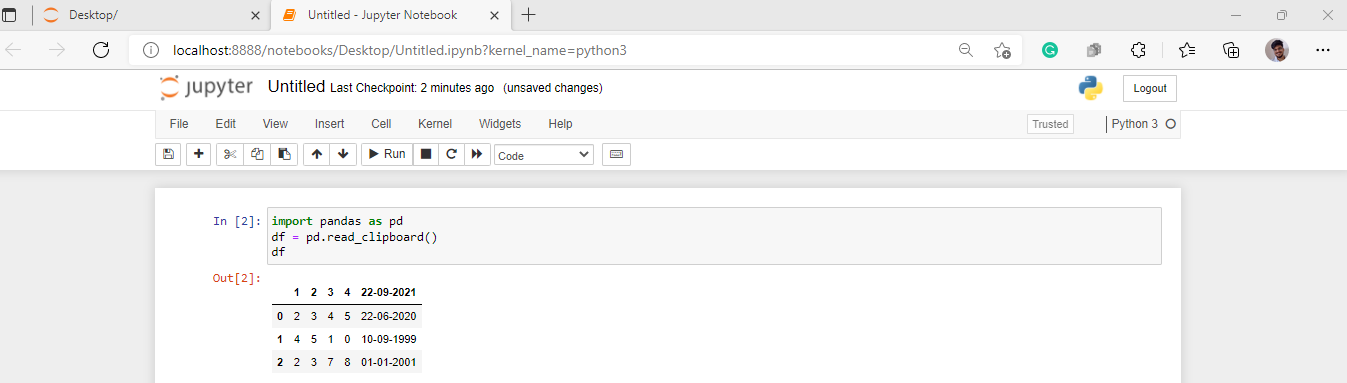

9. Write a Pandas program to check for inequality of two given DataFrames.

In [ ]:
df1 = pd.DataFrame({'W':[68,75,86,80,None],'X':[78,85,None,80,86], 'Y':[84,94,89,83,86],'Z':[86,97,96,72,83]});
df2 = pd.DataFrame({'W':[78,75,86,80,None],'X':[78,85,96,80,76], 'Y':[84,84,89,83,86],'Z':[86,97,96,72,83]});
print("Original DataFrames:")
print(df1)
print(df2)
print("Check for inequality of the said dataframes:")
print(df1.ne(df2))

Original DataFrames:
      W     X   Y   Z
0  68.0  78.0  84  86
1  75.0  85.0  94  97
2  86.0   NaN  89  96
3  80.0  80.0  83  72
4   NaN  86.0  86  83
      W   X   Y   Z
0  78.0  78  84  86
1  75.0  85  84  97
2  86.0  96  89  96
3  80.0  80  83  72
4   NaN  76  86  83
Check for inequality of the said dataframes:
       W      X      Y      Z
0   True  False  False  False
1  False  False   True  False
2  False   True  False  False
3  False  False  False  False
4   True   True  False  False


10 Write a Pandas program to get lowest n records within each group of a given DataFrame.

In [ ]:
d = {'col1': [1, 2, 3, 4, 7, 11], 'col2': [4, 5, 6, 9, 5, 0], 'col3': [7, 5, 8, 12, 1,11]}
df = pd.DataFrame(data=d)
print("Original DataFrame")
print(df)
print("\nLowest n records within each group of a DataFrame:")
df1 = df.nsmallest(3, 'col1')
print(df1)
df2 = df.nsmallest(3, 'col2')
print(df2)
df3 = df.nsmallest(3, 'col3')
print(df3)

Original DataFrame
   col1  col2  col3
0     1     4     7
1     2     5     5
2     3     6     8
3     4     9    12
4     7     5     1
5    11     0    11

Lowest n records within each group of a DataFrame:
   col1  col2  col3
0     1     4     7
1     2     5     5
2     3     6     8
   col1  col2  col3
5    11     0    11
0     1     4     7
1     2     5     5
   col1  col2  col3
4     7     5     1
1     2     5     5
0     1     4     7


11 Write a Pandas program to insert a column at a specific index in a given DataFrame.

In [ ]:
df = pd.DataFrame({
    'Code':['s001','s002','s003','s001','s002','s004'],
    'Name':['Yash','Akanksha','Janvi','Vijay','Karan','Malvika'],
    'Class':['PG','PG','X','XII','IX','V'],
    'Weight':[60,65,50,70,68,55]},
    index = [1,2,3,4,5,6])
print("\nOriginal data")
print(df)
DOB = ['16/09/1999','02/01/1998','05/03/1997','16/02/1999','25/09/1998','11/05/2002']
idx = 3
print("\nInsert 'DOB' column in 3rd position\n")
df.insert(loc=idx, column='DOB', value = DOB)
print(df)



Original data
   Code      Name Class  Weight
1  s001      Yash    PG      60
2  s002  Akanksha    PG      65
3  s003     Janvi     X      50
4  s001     Vijay   XII      70
5  s002     Karan    IX      68
6  s004   Malvika     V      55

Insert 'DOB' column in 3rd position

   Code      Name Class         DOB  Weight
1  s001      Yash    PG  16/09/1999      60
2  s002  Akanksha    PG  02/01/1998      65
3  s003     Janvi     X  05/03/1997      50
4  s001     Vijay   XII  16/02/1999      70
5  s002     Karan    IX  25/09/1998      68
6  s004   Malvika     V  11/05/2002      55


12 Write a Pandas program to print a DataFrame without index.

In [ ]:
# Let us consider previous dataframe
print("Original data\n")
print(df)
print("\n Dataframe without index\n")
print(df.to_string(index=False))

Original data

   Code      Name Class         DOB  Weight
1  s001      Yash    PG  16/09/1999      60
2  s002  Akanksha    PG  02/01/1998      65
3  s003     Janvi     X  05/03/1997      50
4  s001     Vijay   XII  16/02/1999      70
5  s002     Karan    IX  25/09/1998      68
6  s004   Malvika     V  11/05/2002      55

 Dataframe without index

 Code      Name Class         DOB  Weight
 s001      Yash    PG  16/09/1999      60
 s002  Akanksha    PG  02/01/1998      65
 s003     Janvi     X  05/03/1997      50
 s001     Vijay   XII  16/02/1999      70
 s002     Karan    IX  25/09/1998      68
 s004   Malvika     V  11/05/2002      55


13 Write a Pandas program to find integer index of rows with missing data in a given dataframe.

In [ ]:
df = pd.DataFrame({
    'Code':['s001','s002','s003','s001','s002','s004'],
    'Name':['Yash','Akanksha','Janvi','Vijay','Karan','Malvika'],
    'Class':['PG','PG','X','XII','IX','V'],
    'Weight':[60,None,50,70,None,55]},
    index = [1,2,3,4,5,6])
print("\nOriginal data")
print(df)
index = df['Weight'].index[df['Weight'].apply(np.isnan)]
df_index = df.index.values.tolist()
print("\nInteger index of rows with missing values are")
print([df_index.index(i) for i in index])



Original data
   Code      Name Class  Weight
1  s001      Yash    PG    60.0
2  s002  Akanksha    PG     NaN
3  s003     Janvi     X    50.0
4  s001     Vijay   XII    70.0
5  s002     Karan    IX     NaN
6  s004   Malvika     V    55.0

Integer index of rows with missing values are
[1, 4]


14 Write a Pandas program to start index with different value rather than 0 in a given DataFrame.

In [ ]:
df = pd.DataFrame({
    'Code':['s001','s002','s003','s001','s002','s004'],
    'Name':['Yash','Akanksha','Janvi','Vijay','Karan','Malvika'],
    'Class':['PG','PG','X','XII','IX','V'],
    'Weight':[60,66,50,70,65,55]})
print("\nOriginal data")
print(df)
print("\nDefault index")
print(df.index)
df.index += 10
print("\nNew index range")
print(df.index)
print("\nDataframe with new index")
print(df)


Original data
   Code      Name Class  Weight
0  s001      Yash    PG      60
1  s002  Akanksha    PG      66
2  s003     Janvi     X      50
3  s001     Vijay   XII      70
4  s002     Karan    IX      65
5  s004   Malvika     V      55

Default index
RangeIndex(start=0, stop=6, step=1)

New index range
RangeIndex(start=10, stop=16, step=1)

Dataframe with new index
    Code      Name Class  Weight
10  s001      Yash    PG      60
11  s002  Akanksha    PG      66
12  s003     Janvi     X      50
13  s001     Vijay   XII      70
14  s002     Karan    IX      65
15  s004   Malvika     V      55


15 Write a Pandas program to select rows by filtering on one or more column(s) in a multi-index dataframe. 

In [ ]:
df = pd.DataFrame({
    'Code':['s001','s002','s003','s001','s002','s004'],
    'Name':['Yash','Akanksha','Janvi','Vijay','Karan','Malvika'],
    'Class':['PG','PG','X','XII','IX','V'],
    'Weight':[60,66,50,70,65,55],
    'DOB':['16/09/1999','02/01/1998','05/03/1997','16/02/1999','25/09/1998','11/05/2002'],
    'tcode':['t1', 't2', 't3', 't4', 't5', 't6']})
print("\nOriginal data")
print(df)
print("\nCreating MultiIndex on 'tcode' and 'Code' ")
df = df.set_index(['tcode', 'Code'])
print(df)
print("\nSelect rows from 'tcode' column ")
print(df.query("tcode == 't2' "))
print("\nSelect rows from 'Code' column")
print(df.query("Code == 's001' "))
print("\nSelect rows from 'tcode' and 'scode' columns ")
print(df.query(("tcode == 't1' ") and ("Code == 's001' ")))



Original data
   Code      Name Class  Weight         DOB tcode
0  s001      Yash    PG      60  16/09/1999    t1
1  s002  Akanksha    PG      66  02/01/1998    t2
2  s003     Janvi     X      50  05/03/1997    t3
3  s001     Vijay   XII      70  16/02/1999    t4
4  s002     Karan    IX      65  25/09/1998    t5
5  s004   Malvika     V      55  11/05/2002    t6

Creating MultiIndex on 'tcode' and 'Code' 
                Name Class  Weight         DOB
tcode Code                                    
t1    s001      Yash    PG      60  16/09/1999
t2    s002  Akanksha    PG      66  02/01/1998
t3    s003     Janvi     X      50  05/03/1997
t4    s001     Vijay   XII      70  16/02/1999
t5    s002     Karan    IX      65  25/09/1998
t6    s004   Malvika     V      55  11/05/2002

Select rows from 'tcode' column 
                Name Class  Weight         DOB
tcode Code                                    
t2    s002  Akanksha    PG      66  02/01/1998

Select rows from 'Code' column
        

16 Write a Pandas program to extract only words from a given column of a given DataFrame.

In [ ]:
df = pd.DataFrame({
    'company_code': ['Abcd','EFGF', 'zefsalf', 'sdfslew', 'zekfsdf'],
    'date_of_sale': ['12/05/2002','16/02/1999','05/09/1998','12/02/2022','15/09/1997'],
    'address': ['9910 Surrey Ave.','92 N. Bishop Ave.','9910 Golden Star Ave.', '102 Dunbar St.', '17 West Livingston Court']
})
print("Original DataFrame:")
print(df)

def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    return " ".join(result)

df['only_words']=df['address'].apply(lambda x : search_words(x))
print("\nOnly words:")
print(df)

Original DataFrame:
  company_code date_of_sale                   address
0         Abcd   12/05/2002          9910 Surrey Ave.
1         EFGF   16/02/1999         92 N. Bishop Ave.
2      zefsalf   05/09/1998     9910 Golden Star Ave.
3      sdfslew   12/02/2022            102 Dunbar St.
4      zekfsdf   15/09/1997  17 West Livingston Court

Only words:
  company_code date_of_sale                   address             only_words
0         Abcd   12/05/2002          9910 Surrey Ave.             Surrey Ave
1         EFGF   16/02/1999         92 N. Bishop Ave.           N Bishop Ave
2      zefsalf   05/09/1998     9910 Golden Star Ave.        Golden Star Ave
3      sdfslew   12/02/2022            102 Dunbar St.              Dunbar St
4      zekfsdf   15/09/1997  17 West Livingston Court  West Livingston Court


17 Write a Pandas program to extract the sentences where a specific word is present in a given column of a given DataFrame.

In [ ]:
print("Original DataFrame:")
print(df)
def pick_only_key_sentence(str1, word):
    result = re.findall(r'([^.]*'+word+'[^.]*)', str1)
    return result
df['filter_sentence']=df['address'].apply(lambda x : pick_only_key_sentence(x,'Avenue'))
print("\nText with the word 'Avenue':")
print(df)

Original DataFrame:
  company_code date_of_sale                   address             only_words
0         Abcd   12/05/2002          9910 Surrey Ave.             Surrey Ave
1         EFGF   16/02/1999         92 N. Bishop Ave.           N Bishop Ave
2      zefsalf   05/09/1998     9910 Golden Star Ave.        Golden Star Ave
3      sdfslew   12/02/2022            102 Dunbar St.              Dunbar St
4      zekfsdf   15/09/1997  17 West Livingston Court  West Livingston Court

Text with the word 'Avenue':
  company_code date_of_sale  ...             only_words filter_sentence
0         Abcd   12/05/2002  ...             Surrey Ave              []
1         EFGF   16/02/1999  ...           N Bishop Ave              []
2      zefsalf   05/09/1998  ...        Golden Star Ave              []
3      sdfslew   12/02/2022  ...              Dunbar St              []
4      zekfsdf   15/09/1997  ...  West Livingston Court              []

[5 rows x 5 columns]


18 Write a Pandas program to extract the unique sentences from a given column of a given DataFrame.

In [ ]:
print("Original DataFrame:")
print(df)

def find_unique_sentence(str1):
    result = re.findall(r'(?sm)(^[^\r\n]+$)(?!.*^\1$)', str1)
    return result

df['unique_sentence']=df['address'].apply(lambda st : find_unique_sentence(st))
print("\nExtract unique sentences :")
print(df)

Original DataFrame:
  company_code date_of_sale  ...             only_words filter_sentence
0         Abcd   12/05/2002  ...             Surrey Ave              []
1         EFGF   16/02/1999  ...           N Bishop Ave              []
2      zefsalf   05/09/1998  ...        Golden Star Ave              []
3      sdfslew   12/02/2022  ...              Dunbar St              []
4      zekfsdf   15/09/1997  ...  West Livingston Court              []

[5 rows x 5 columns]

Extract unique sentences :
  company_code date_of_sale  ... filter_sentence             unique_sentence
0         Abcd   12/05/2002  ...              []          [9910 Surrey Ave.]
1         EFGF   16/02/1999  ...              []         [92 N. Bishop Ave.]
2      zefsalf   05/09/1998  ...              []     [9910 Golden Star Ave.]
3      sdfslew   12/02/2022  ...              []            [102 Dunbar St.]
4      zekfsdf   15/09/1997  ...              []  [17 West Livingston Court]

[5 rows x 6 columns]


19 Write a Pandas program to extract words starting with capital words from a given column of a given DataFrame.

In [ ]:
print("Original DataFrame:")
print(df)

def find_unique_sentence(str1):
    result = re.findall(r'(?sm)(^[^\r\n]+$)(?!.*^\1$)', str1)
    return result

df['unique_sentence']=df['address'].apply(lambda st : find_unique_sentence(st))
print("\nExtract unique sentences :")
print(df)

Original DataFrame:
  company_code date_of_sale  ... filter_sentence             unique_sentence
0         Abcd   12/05/2002  ...              []          [9910 Surrey Ave.]
1         EFGF   16/02/1999  ...              []         [92 N. Bishop Ave.]
2      zefsalf   05/09/1998  ...              []     [9910 Golden Star Ave.]
3      sdfslew   12/02/2022  ...              []            [102 Dunbar St.]
4      zekfsdf   15/09/1997  ...              []  [17 West Livingston Court]

[5 rows x 6 columns]

Extract unique sentences :
  company_code date_of_sale  ... filter_sentence             unique_sentence
0         Abcd   12/05/2002  ...              []          [9910 Surrey Ave.]
1         EFGF   16/02/1999  ...              []         [92 N. Bishop Ave.]
2      zefsalf   05/09/1998  ...              []     [9910 Golden Star Ave.]
3      sdfslew   12/02/2022  ...              []            [102 Dunbar St.]
4      zekfsdf   15/09/1997  ...              []  [17 West Livingston Court]

[5 ro

20 Write a Pandas program to remove the html tags within the specified column of a given DataFrame.

In [ ]:
print("Original DataFrame:")
print(df)
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
df['with_out_tags']=df['address'].apply(lambda cw : remove_tags(cw))
print("\nSentences without tags':")
print(df)

Original DataFrame:
  company_code date_of_sale  ... filter_sentence             unique_sentence
0         Abcd   12/05/2002  ...              []          [9910 Surrey Ave.]
1         EFGF   16/02/1999  ...              []         [92 N. Bishop Ave.]
2      zefsalf   05/09/1998  ...              []     [9910 Golden Star Ave.]
3      sdfslew   12/02/2022  ...              []            [102 Dunbar St.]
4      zekfsdf   15/09/1997  ...              []  [17 West Livingston Court]

[5 rows x 6 columns]

Sentences without tags':
  company_code  ...             with_out_tags
0         Abcd  ...          9910 Surrey Ave.
1         EFGF  ...         92 N. Bishop Ave.
2      zefsalf  ...     9910 Golden Star Ave.
3      sdfslew  ...            102 Dunbar St.
4      zekfsdf  ...  17 West Livingston Court

[5 rows x 7 columns]


21 Write a Pandas program to create a new DataFrame based on existing series, using specified argument and override the existing columns names.

In [ ]:
s1 = pd.Series([0, 1, 2, 3], name='col1')
s2 = pd.Series([0, 1, 2, 3])
s3 = pd.Series([0, 1, 4, 5], name='col3')
df = pd.concat([s1, s2, s3], axis=1, keys=['column1', 'column2', 'column3'])
print(df)

   column1  column2  column3
0        0        0        0
1        1        1        1
2        2        2        4
3        3        3        5


22 Write a Pandas program to create a combination from two dataframes where a column id combination appears more than once in both dataframes.

In [ ]:
data1 = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'P': ['P0', 'P1', 'P2', 'P3'],
                     'Q': ['Q0', 'Q1', 'Q2', 'Q3']}) 
data2 = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'R': ['R0', 'R1', 'R2', 'R3'],
                      'S': ['S0', 'S1', 'S2', 'S3']})
print("Original DataFrames:")
print(data1)
print("--------------------")
print(data2)
print("\nMerged Data (many-to-many join case):")
result = pd.merge(data1, data2, on='key1')
print(result)

Original DataFrames:
  key1 key2   P   Q
0   K0   K0  P0  Q0
1   K0   K1  P1  Q1
2   K1   K0  P2  Q2
3   K2   K1  P3  Q3
--------------------
  key1 key2   R   S
0   K0   K0  R0  S0
1   K1   K0  R1  S1
2   K1   K0  R2  S2
3   K2   K0  R3  S3

Merged Data (many-to-many join case):
  key1 key2_x   P   Q key2_y   R   S
0   K0     K0  P0  Q0     K0  R0  S0
1   K0     K1  P1  Q1     K0  R0  S0
2   K1     K0  P2  Q2     K0  R1  S1
3   K1     K0  P2  Q2     K0  R2  S2
4   K2     K1  P3  Q3     K0  R3  S3


23 Write a Pandas program to combine the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [ ]:
data1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                      'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])

data2 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])
 
print("Original DataFrames:")
print(data1)
print("--------------------")
print(data2)
print("\nMerged Data (Joining on index):")
result = data1.join(data2)
print(result)

Original DataFrames:
     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
--------------------
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3

Merged Data (Joining on index):
     A   B    C    D
K0  A0  B0   C0   D0
K1  A1  B1  NaN  NaN
K2  A2  B2   C2   D2


24 Write a Pandas program to merge two given dataframes with different columns.

In [ ]:
data1 = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'P': ['P0', 'P1', 'P2', 'P3'],
                     'Q': ['Q0', 'Q1', 'Q2', 'Q3']}) 
data2 = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'R': ['R0', 'R1', 'R2', 'R3'],
                      'S': ['S0', 'S1', 'S2', 'S3']})
print("Original DataFrames:")
print(data1)
print("--------------------")
print(data2)
print("\nMerge two dataframes with different columns:")
result = pd.concat([data1,data2], axis=0, ignore_index=True)
print(result)

Original DataFrames:
  key1 key2   P   Q
0   K0   K0  P0  Q0
1   K0   K1  P1  Q1
2   K1   K0  P2  Q2
3   K2   K1  P3  Q3
--------------------
  key1 key2   R   S
0   K0   K0  R0  S0
1   K1   K0  R1  S1
2   K1   K0  R2  S2
3   K2   K0  R3  S3

Merge two dataframes with different columns:
  key1 key2    P    Q    R    S
0   K0   K0   P0   Q0  NaN  NaN
1   K0   K1   P1   Q1  NaN  NaN
2   K1   K0   P2   Q2  NaN  NaN
3   K2   K1   P3   Q3  NaN  NaN
4   K0   K0  NaN  NaN   R0   S0
5   K1   K0  NaN  NaN   R1   S1
6   K1   K0  NaN  NaN   R2   S2
7   K2   K0  NaN  NaN   R3   S3


25 Write a Pandas program to Combine two DataFrame objects by filling null values in one DataFrame with non-null values from other DataFrame.

In [ ]:
df1 = pd.DataFrame({'A': [None, 0, None], 'B': [3, 4, 5]})
df2 = pd.DataFrame({'A': [1, 1, 3], 'B': [3, None, 3]})
df1.combine_first(df2)
print("Original DataFrames:")
print(df1)
print("--------------------")
print(df2)
print("\nMerge two dataframes with different columns:")
result = df1.combine_first(df2)
print(result)

Original DataFrames:
     A  B
0  NaN  3
1  0.0  4
2  NaN  5
--------------------
   A    B
0  1  3.0
1  1  NaN
2  3  3.0

Merge two dataframes with different columns:
     A  B
0  1.0  3
1  0.0  4
2  3.0  5


26 Write a Pandas program to create a period index represent all monthly boundaries of a given year. Also print start and end time for each period object in the said index.

In [ ]:
sdt = datetime(2020, 1, 1)
edt = datetime(2020, 12, 31)
dateset = pd.period_range(sdt, edt, freq='M')
print("All monthly boundaries of a given year:")
print(dateset) 
print("\nStart and end time for each period object in the said index:")
for d in dateset: 
    print ("{0} {1}".format(d.start_time, d.end_time)) 

All monthly boundaries of a given year:
PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]', freq='M')

Start and end time for each period object in the said index:
2020-01-01 00:00:00 2020-01-31 23:59:59.999999999
2020-02-01 00:00:00 2020-02-29 23:59:59.999999999
2020-03-01 00:00:00 2020-03-31 23:59:59.999999999
2020-04-01 00:00:00 2020-04-30 23:59:59.999999999
2020-05-01 00:00:00 2020-05-31 23:59:59.999999999
2020-06-01 00:00:00 2020-06-30 23:59:59.999999999
2020-07-01 00:00:00 2020-07-31 23:59:59.999999999
2020-08-01 00:00:00 2020-08-31 23:59:59.999999999
2020-09-01 00:00:00 2020-09-30 23:59:59.999999999
2020-10-01 00:00:00 2020-10-31 23:59:59.999999999
2020-11-01 00:00:00 2020-11-30 23:59:59.999999999
2020-12-01 00:00:00 2020-12-31 23:59:59.999999999


27 Write a Pandas program create a series with a PeriodIndex which represents all the calendar month periods in 2029 and 2031. Also print the values for all periods in 2030. Go to the editor
Note: PeriodIndex is an immutable ndarray holding ordinal values indicating regular periods in time such as particular years, quarters, months, etc.

In [ ]:
pi = pd.Series(np.random.randn(36), 
               pd.period_range('1/1/2029', 
                               '12/31/2031', freq='M'))
print("PeriodIndex which represents all the calendar month periods in 2029 and 2030:")
print(pi)
print("\nValues for all periods in 2030:")
print(pi['2030'])

PeriodIndex which represents all the calendar month periods in 2029 and 2030:
2029-01    0.077548
2029-02    0.672124
2029-03    0.953343
2029-04    1.072998
2029-05    1.248167
2029-06    0.339021
2029-07   -1.008638
2029-08   -0.252589
2029-09    0.182859
2029-10   -0.401333
2029-11   -0.194447
2029-12    0.904104
2030-01   -0.561375
2030-02    0.486797
2030-03    1.322374
2030-04   -0.039410
2030-05    1.577161
2030-06   -1.360977
2030-07   -0.070799
2030-08    0.459597
2030-09   -0.383153
2030-10   -0.035987
2030-11    0.633163
2030-12    0.864105
2031-01    1.287997
2031-02   -0.769083
2031-03    1.084010
2031-04   -1.712547
2031-05    0.411350
2031-06   -0.425181
2031-07   -0.217704
2031-08    0.989020
2031-09   -1.050803
2031-10   -0.381354
2031-11    1.468795
2031-12   -0.620677
Freq: M, dtype: float64

Values for all periods in 2030:
2030-01   -0.561375
2030-02    0.486797
2030-03    1.322374
2030-04   -0.039410
2030-05    1.577161
2030-06   -1.360977
2030-07   -0.070799
2030-

28 Write a Pandas program to generate holidays between two dates using the US federal holiday calendar.

In [ ]:
sdt = datetime(2021, 1, 1)
edt = datetime(2030, 12, 31)
print("Holidays between 2021-01-01 and 2030-12-31 using the US federal holiday calendar.")
cal = USFederalHolidayCalendar()
for dt in cal.holidays(start=sdt, end=edt): 
    print (dt)

Holidays between 2021-01-01 and 2030-12-31 using the US federal holiday calendar.
2021-01-01 00:00:00
2021-01-18 00:00:00
2021-02-15 00:00:00
2021-05-31 00:00:00
2021-07-05 00:00:00
2021-09-06 00:00:00
2021-10-11 00:00:00
2021-11-11 00:00:00
2021-11-25 00:00:00
2021-12-24 00:00:00
2021-12-31 00:00:00
2022-01-17 00:00:00
2022-02-21 00:00:00
2022-05-30 00:00:00
2022-07-04 00:00:00
2022-09-05 00:00:00
2022-10-10 00:00:00
2022-11-11 00:00:00
2022-11-24 00:00:00
2022-12-26 00:00:00
2023-01-02 00:00:00
2023-01-16 00:00:00
2023-02-20 00:00:00
2023-05-29 00:00:00
2023-07-04 00:00:00
2023-09-04 00:00:00
2023-10-09 00:00:00
2023-11-10 00:00:00
2023-11-23 00:00:00
2023-12-25 00:00:00
2024-01-01 00:00:00
2024-01-15 00:00:00
2024-02-19 00:00:00
2024-05-27 00:00:00
2024-07-04 00:00:00
2024-09-02 00:00:00
2024-10-14 00:00:00
2024-11-11 00:00:00
2024-11-28 00:00:00
2024-12-25 00:00:00
2025-01-01 00:00:00
2025-01-20 00:00:00
2025-02-17 00:00:00
2025-05-26 00:00:00
2025-07-04 00:00:00
2025-09-01 00:00:0

29 Write a Pandas program to create a monthly time period and display the list of names in the current local scope.

In [ ]:
mtp = pd.Period('2021-11','M')
print("Monthly time perid: ",mtp)
print("\nList of names in the current local scope:")
print(dir(mtp)) 

Monthly time perid:  2021-11

List of names in the current local scope:
['__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pyx_vtable__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_add_delta', '_add_offset', '_dtype', '_from_ordinal', '_get_to_timestamp_base', '_maybe_convert_freq', 'asfreq', 'day', 'dayofweek', 'dayofyear', 'days_in_month', 'daysinmonth', 'end_time', 'freq', 'freqstr', 'hour', 'is_leap_year', 'minute', 'month', 'now', 'ordinal', 'quarter', 'qyear', 'second', 'start_time', 'strftime', 'to_timestamp', 'week', 'weekday', 'weekofyear', 'year']


30 Write a Pandas program to create a yearly time period from a specified year and display the properties of this period.

In [ ]:
ytp = pd.Period('2020','A-DEC')
print("Yearly time perid:",ytp)
print("\nAll the properties of the said period:")
print(dir(ytp))

Yearly time perid: 2020

All the properties of the said period:
['__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pyx_vtable__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_add_delta', '_add_offset', '_dtype', '_from_ordinal', '_get_to_timestamp_base', '_maybe_convert_freq', 'asfreq', 'day', 'dayofweek', 'dayofyear', 'days_in_month', 'daysinmonth', 'end_time', 'freq', 'freqstr', 'hour', 'is_leap_year', 'minute', 'month', 'now', 'ordinal', 'quarter', 'qyear', 'second', 'start_time', 'strftime', 'to_timestamp', 'week', 'weekday', 'weekofyear', 'year']


31 Write a Pandas program to rename all and only some of the column names from world alcohol consumption dataset.

In [ ]:
w_a_con = pd.read_csv('/content/world_alcohol.csv')
new_w_a_con = pd.read_csv('/content/world_alcohol.csv')
print("World alcohol consumption sample data:")
print(w_a_con.head())
print("\nRename all the column names:")
w_a_con.columns = ['year','who_region','country','beverage_types','display_values']
print(w_a_con.head())
print("\nRenaming only some of the column names:")
new_w_a_con.rename(columns = {"WHO region":"WHO_region","Display Value":"Display_Value" },inplace = True)
print(new_w_a_con.head()) 

World alcohol consumption sample data:
   Year       WHO region                Country Beverage Types  Display Value
0  1986  Western Pacific               Viet Nam           Wine           0.00
1  1986         Americas                Uruguay          Other           0.50
2  1985           Africa           Cte d'Ivoire           Wine           1.62
3  1986         Americas               Colombia           Beer           4.27
4  1987         Americas  Saint Kitts and Nevis           Beer           1.98

Rename all the column names:
   year       who_region                country beverage_types  display_values
0  1986  Western Pacific               Viet Nam           Wine            0.00
1  1986         Americas                Uruguay          Other            0.50
2  1985           Africa           Cte d'Ivoire           Wine            1.62
3  1986         Americas               Colombia           Beer            4.27
4  1987         Americas  Saint Kitts and Nevis           Beer      

32 Write a Pandas program to find which years have all non-zero values and which years have any non-zero values from world alcohol consumption dataset. 

In [ ]:
w_a_con = pd.read_csv('/content/world_alcohol.csv')
print("World alcohol consumption sample data:")
print(w_a_con.head())
print("\nFind which years have all non-zero values:")
print(w_a_con.loc[:,w_a_con.all()])
print("\nFind which years have any non-zero values:")
print(w_a_con.loc[:,w_a_con.any()])

World alcohol consumption sample data:
   Year       WHO region                Country Beverage Types  Display Value
0  1986  Western Pacific               Viet Nam           Wine           0.00
1  1986         Americas                Uruguay          Other           0.50
2  1985           Africa           Cte d'Ivoire           Wine           1.62
3  1986         Americas               Colombia           Beer           4.27
4  1987         Americas  Saint Kitts and Nevis           Beer           1.98

Find which years have all non-zero values:
    Year       WHO region                                Country Beverage Types
0   1986  Western Pacific                               Viet Nam           Wine
1   1986         Americas                                Uruguay          Other
2   1985           Africa                           Cte d'Ivoire           Wine
3   1986         Americas                               Colombia           Beer
4   1987         Americas                  Saint 

33 Write a Pandas program to filter all columns where all entries present, check which rows and columns has a NaN and finally drop rows with any NaNs from world alcohol consumption dataset.

In [ ]:
w_a_con = pd.read_csv('/content/world_alcohol.csv')
print("World alcohol consumption sample data:")
print(w_a_con.head())
print("\nFind  all columns which all entries present:")
print(w_a_con.loc[:, w_a_con.notnull().all()])
print("\nRows and columns has a NaN:")
print(w_a_con.loc[:,w_a_con.isnull().any()])
print("\nDrop rows with any NaNs:")
print(w_a_con.dropna(how='any'))  

World alcohol consumption sample data:
   Year       WHO region                Country Beverage Types  Display Value
0  1986  Western Pacific               Viet Nam           Wine           0.00
1  1986         Americas                Uruguay          Other           0.50
2  1985           Africa           Cte d'Ivoire           Wine           1.62
3  1986         Americas               Colombia           Beer           4.27
4  1987         Americas  Saint Kitts and Nevis           Beer           1.98

Find  all columns which all entries present:
    Year       WHO region                                Country Beverage Types
0   1986  Western Pacific                               Viet Nam           Wine
1   1986         Americas                                Uruguay          Other
2   1985           Africa                           Cte d'Ivoire           Wine
3   1986         Americas                               Colombia           Beer
4   1987         Americas                  Sain

34 Write a Pandas program to filter all records starting from the 'Year' column, access every other column from world alcohol consumption dataset.

In [ ]:
w_a_con = pd.read_csv('/content/world_alcohol.csv')
print("World alcohol consumption sample data:")
print(w_a_con.head())
print("\nFrom the 'Year' column, access every other column:")
print(w_a_con.loc[:,'Year'::2].head(10))
print("\nAlternate solution:")
print(w_a_con.iloc[:,0::2].head(10))

World alcohol consumption sample data:
   Year       WHO region                Country Beverage Types  Display Value
0  1986  Western Pacific               Viet Nam           Wine           0.00
1  1986         Americas                Uruguay          Other           0.50
2  1985           Africa           Cte d'Ivoire           Wine           1.62
3  1986         Americas               Colombia           Beer           4.27
4  1987         Americas  Saint Kitts and Nevis           Beer           1.98

From the 'Year' column, access every other column:
   Year                Country  Display Value
0  1986               Viet Nam           0.00
1  1986                Uruguay           0.50
2  1985           Cte d'Ivoire           1.62
3  1986               Colombia           4.27
4  1987  Saint Kitts and Nevis           1.98
5  1987              Guatemala           0.00
6  1987              Mauritius           0.13
7  1985                 Angola           0.39
8  1986    Antigua and Barb

35 Write a Pandas program to filter all records starting from the 2nd row, access every 5th row from world alcohol consumption dataset.

In [ ]:
w_a_con = pd.read_csv('/content/world_alcohol.csv')
print("World alcohol consumption sample data:")
print(w_a_con.head())
print("\nStarting from the 2nd row, access every 5th row:")
print(w_a_con.iloc[1::5].head(10))

World alcohol consumption sample data:
   Year       WHO region                Country Beverage Types  Display Value
0  1986  Western Pacific               Viet Nam           Wine           0.00
1  1986         Americas                Uruguay          Other           0.50
2  1985           Africa           Cte d'Ivoire           Wine           1.62
3  1986         Americas               Colombia           Beer           4.27
4  1987         Americas  Saint Kitts and Nevis           Beer           1.98

Starting from the 2nd row, access every 5th row:
    Year             WHO region  ... Beverage Types Display Value
1   1986               Americas  ...          Other          0.50
6   1987                 Africa  ...           Wine          0.13
11  1989               Americas  ...           Beer          0.62
16  1984               Americas  ...           Wine          0.06
21  1989               Americas  ...        Spirits          4.51
26  1985                 Europe  ...           

36 Create a dataframe of ten rows, four columns with random values. Write a Pandas program to highlight the entire row in Yellow where a specific column value is greater than 0.5

In [ ]:
np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
print("Original array:")
print(df)
print("\nDataframe - table style:")

def highlight_greaterthan(x):
    if x.C > .5:
        return ['background-color: yellow']*5
    else:
        return ['background-color: white']*5 
df.style.apply(highlight_greaterthan, axis=1)

Original array:
      A         B         C         D         E
0   1.0  1.329212 -0.770033 -0.316280 -0.990810
1   2.0 -1.070816 -1.438713  0.564417  0.295722
2   3.0 -1.626404  0.219565  0.678805  1.889273
3   4.0  0.961538  0.104011 -0.481165  0.850229
4   5.0  1.453425  1.057737  0.165562  0.515018
5   6.0 -1.336936  0.562861  1.392855 -0.063328
6   7.0  0.121668  1.207603 -0.002040  1.627796
7   8.0  0.354493  1.037528 -0.385684  0.519818
8   9.0  1.686583 -1.325963  1.428984 -2.089354
9  10.0 -0.129820  0.631523 -0.586538  0.290720

Dataframe - table style:


,A,B,C,D,E
0,1.000000,1.329212,-0.770033,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,-0.481165,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


37 Create a dataframe of ten rows, four columns with random values. Write a Pandas program to display the dataframe in Heatmap style.

In [ ]:
np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
print("Original array:")
print(df)
print("\nDataframe - Heatmap style:")

cm = sns.light_palette("red", as_cmap=True)
 
df.style.background_gradient(cmap='viridis')

Original array:
      A         B         C         D         E
0   1.0  1.329212 -0.770033 -0.316280 -0.990810
1   2.0 -1.070816 -1.438713  0.564417  0.295722
2   3.0 -1.626404  0.219565  0.678805  1.889273
3   4.0  0.961538  0.104011 -0.481165  0.850229
4   5.0  1.453425  1.057737  0.165562  0.515018
5   6.0 -1.336936  0.562861  1.392855 -0.063328
6   7.0  0.121668  1.207603 -0.002040  1.627796
7   8.0  0.354493  1.037528 -0.385684  0.519818
8   9.0  1.686583 -1.325963  1.428984 -2.089354
9  10.0 -0.129820  0.631523 -0.586538  0.290720

Dataframe - Heatmap style:


,A,B,C,D,E
0,1.000000,1.329212,-0.770033,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,-0.481165,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


38 Create a dataframe of ten rows, four columns with random values. Write a Pandas program to make a gradient color mapping on a specified column.

In [ ]:
np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
print("Original array:")
print(df)
print("\nDataframe - Gradient color:")
df.style.background_gradient(subset=['C'])

Original array:
      A         B         C         D         E
0   1.0  1.329212 -0.770033 -0.316280 -0.990810
1   2.0 -1.070816 -1.438713  0.564417  0.295722
2   3.0 -1.626404  0.219565  0.678805  1.889273
3   4.0  0.961538  0.104011 -0.481165  0.850229
4   5.0  1.453425  1.057737  0.165562  0.515018
5   6.0 -1.336936  0.562861  1.392855 -0.063328
6   7.0  0.121668  1.207603 -0.002040  1.627796
7   8.0  0.354493  1.037528 -0.385684  0.519818
8   9.0  1.686583 -1.325963  1.428984 -2.089354
9  10.0 -0.129820  0.631523 -0.586538  0.290720

Dataframe - Gradient color:


,A,B,C,D,E
0,1.000000,1.329212,-0.770033,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,-0.481165,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


39 Create a dataframe of ten rows, four columns with random values. Write a Pandas program to make a gradient color on all the values of the said dataframe.

In [ ]:
np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
print("Original array:")
print(df)
print("\nDataframe - Gradient color:")
df.style.background_gradient()

Original array:
      A         B         C         D         E
0   1.0  1.329212 -0.770033 -0.316280 -0.990810
1   2.0 -1.070816 -1.438713  0.564417  0.295722
2   3.0 -1.626404  0.219565  0.678805  1.889273
3   4.0  0.961538  0.104011 -0.481165  0.850229
4   5.0  1.453425  1.057737  0.165562  0.515018
5   6.0 -1.336936  0.562861  1.392855 -0.063328
6   7.0  0.121668  1.207603 -0.002040  1.627796
7   8.0  0.354493  1.037528 -0.385684  0.519818
8   9.0  1.686583 -1.325963  1.428984 -2.089354
9  10.0 -0.129820  0.631523 -0.586538  0.290720

Dataframe - Gradient color:


,A,B,C,D,E
0,1.000000,1.329212,-0.770033,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,-0.481165,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


40 Create a dataframe of ten rows, four columns with random values. Write a Pandas program to display the dataframe in table style and border around the table and not around the rows.

In [ ]:
np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[0, 2] = np.nan
df.iloc[3, 3] = np.nan
df.iloc[4, 1] = np.nan
df.iloc[9, 4] = np.nan
print("Original array:")
print(df)
print("\nDataframe - table style and border around the table and not around the rows:")
df.style.set_table_styles([{'selector':'','props':[('border','4px solid #7a7')]}])

Original array:
      A         B         C         D         E
0   1.0  1.329212       NaN -0.316280 -0.990810
1   2.0 -1.070816 -1.438713  0.564417  0.295722
2   3.0 -1.626404  0.219565  0.678805  1.889273
3   4.0  0.961538  0.104011       NaN  0.850229
4   5.0       NaN  1.057737  0.165562  0.515018
5   6.0 -1.336936  0.562861  1.392855 -0.063328
6   7.0  0.121668  1.207603 -0.002040  1.627796
7   8.0  0.354493  1.037528 -0.385684  0.519818
8   9.0  1.686583 -1.325963  1.428984 -2.089354
9  10.0 -0.129820  0.631523 -0.586538       NaN

Dataframe - table style and border around the table and not around the rows:


,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,nan,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,nan


41 Write a Pandas program to import sheet2 data from a given excel data (employee.xlsx ) into a Pandas dataframe.

In [ ]:
df = pd.read_excel('/content/employee.xlsx',sheet_name=1)
print(df)

    emp_id first_name    last_name  hire_date
0      120    Matthew        Weiss 2004-07-18
1      121       Adam        Fripp 2005-04-10
2      122      Payam     Kaufling 2003-05-01
3      123     Shanta      Vollman 2005-10-10
4      124      Kevin      Mourgos 2007-11-16
5      125      Julia        Nayer 2005-07-16
6      126      Irene  Mikkilineni 2006-09-28
7      127      James       Landry 2007-01-14
8      128     Steven       Markle 2008-03-08
9      129      Laura       Bissot 2005-08-20
10     130      Mozhe     Atkinson 2005-10-30
11     131      James       Marlow 2005-02-16
12     132         TJ        Olson 2007-04-10
13     133      Jason       Mallin 2004-06-14
14     134    Michael       Rogers 2006-08-26
15     135         Ki          Gee 2007-12-12
16     136      Hazel   Philtanker 2008-02-06
17     137     Renske       Ladwig 2003-07-14
18     138    Stephen       Stiles 2005-10-26


42 Write a Pandas program to import three datasheets from a given excel data (employee.xlsx ) and combine in to a single dataframe.

In [ ]:
df1 = pd.read_excel('/content/employee.xlsx',sheet_name=0)
df2 = pd.read_excel('/content/employee.xlsx',sheet_name=1)
df3 = pd.read_excel('/content/employee.xlsx',sheet_name=2)
df = pd.concat([df1, df2, df3])
print(df)

    emp_id   first_name    last_name  hire_date
0      100       Steven         King 2003-06-17
1      101        Neena      Kochhar 2005-09-21
2      102          Lex      De Haan 2001-01-13
3      103    Alexander       Hunold 2006-01-03
4      104        Bruce        Ernst 2007-05-21
5      105        David       Austin 2005-06-25
6      106        Valli    Pataballa 2006-02-05
7      107        Diana      Lorentz 2007-02-07
8      108        Nancy    Greenberg 2002-08-17
9      109       Daniel       Faviet 2002-08-16
10     110         John         Chen 2005-09-28
11     111       Ismael      Sciarra 2005-09-30
12     112  Jose Manuel        Urman 2006-03-07
13     113         Luis         Popp 2007-12-07
14     114          Den     Raphaely 2002-12-07
15     115    Alexander         Khoo 2003-05-18
16     116       Shelli        Baida 2005-12-24
17     117        Sigal       Tobias 2005-07-24
18     118          Guy       Himuro 2006-11-15
19     119        Karen   Colmenares 200

43 Write a Pandas program to import excel data (coalpublic2013.xlsx ) into a dataframe and draw a bar plot where each bar will represent one of the top 10 production.

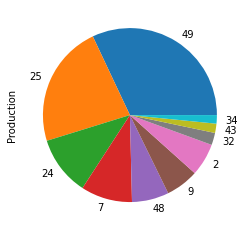

In [ ]:
df = pd.read_excel('/content/coalpublic2013.xlsx')
sorted_by_production = df.sort_values(['Production'], ascending=False).head(10)
sorted_by_production['Production'].head(10).plot(kind="pie")
plt.show()

44 Write a Pandas program to import excel data (coalpublic2013.xlsx ) into a dataframe and draw a bar plot comparing year, MSHA ID, Production and Labor_hours of first ten records. 

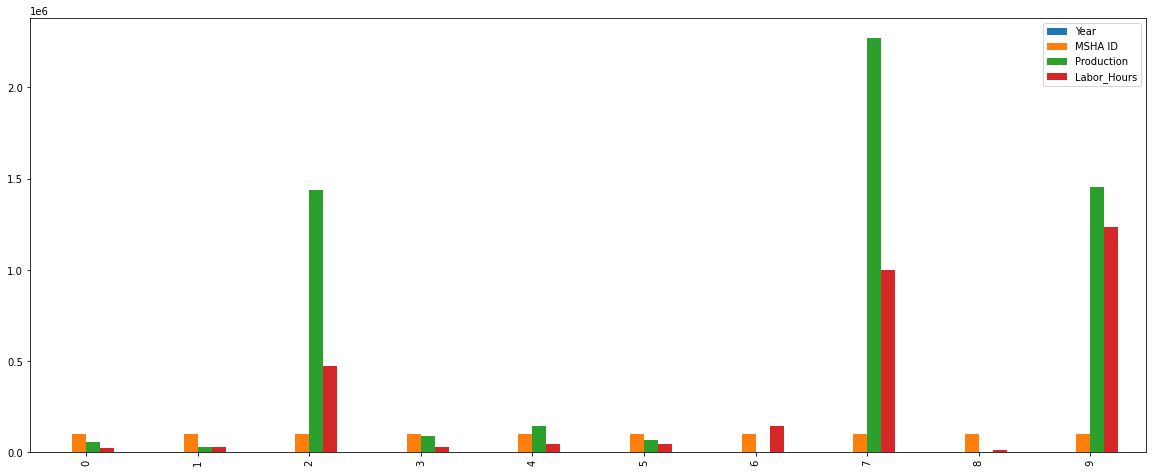

In [ ]:
df = pd.read_excel('/content/coalpublic2013.xlsx')
df.head(10).plot(kind='bar', figsize=(20,8))
plt.show()

45 Write a Pandas program to import three datasheets from a given excel data (employee.xlsx ) into a single dataframe and export the result into new Excel file. 

In [ ]:
df1 = pd.read_excel('/content/employee.xlsx',sheet_name=0)
df2 = pd.read_excel('/content/employee.xlsx',sheet_name=1)
df3 = pd.read_excel('/content/employee.xlsx',sheet_name=2)
df = pd.concat([df1, df2, df3])
df.to_excel('/content/output.xlsx', index=False)

46  Write a Pandas program to create a Pivot table and find number of survivors and average rate grouped by gender and class.

In [ ]:
df = pd.read_csv('/content/titanic (1).csv')
result = df.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})
print(result)

              fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47


47 Write a Pandas program to create a Pivot table and find number of adult male, adult female and children.

In [ ]:
df = pd.read_csv('/content/titanic (1).csv')
result = df.pivot_table('sex',  'who', aggfunc = 'count')
print(result)

       sex
who       
child   83
man    537
woman  271


48 Write a Pandas program to create a Pivot table and check missing values of children.

In [ ]:
df = pd.read_csv('/content/titanic (1).csv')
result = df.loc[df['who']=='child'].isnull().sum()
print(result)

survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
who             0
adult_male      0
deck           70
embark_town     0
alive           0
alone           0
Unnamed: 15    83
dtype: int64


49  Write a Pandas program to create a Pivot table and separate the gender according to whether they traveled alone or not to get the probability of survival.

In [ ]:
df = pd.read_csv('/content/titanic (1).csv')
result = df.pivot_table( 'survived' , [ 'sex' , 'alone' ] , 'class' )
print(result)

class            First    Second     Third
sex    alone                              
female False  0.966667  0.931818  0.416667
       True   0.970588  0.906250  0.616667
male   False  0.425532  0.277778  0.180723
       True   0.333333  0.097222  0.121212


50 Write a Pandas program to create a Pivot table and find the probability of survival by class, gender, solo boarding and port of embarkation.

In [ ]:
df = pd.read_csv('/content/titanic (1).csv')
result = df.pivot_table('survived', ['sex' , 'alone' ], [ 'embark_town', 'class' ])
print(result)

embark_town  Cherbourg                      ... Southampton                    
class            First    Second     Third  ...       First    Second     Third
sex    alone                                ...                                
female False  1.000000  1.000000  0.611111  ...    0.941176  0.923077  0.327586
       True   0.944444  1.000000  0.800000  ...    1.000000  0.892857  0.466667
male   False  0.473684  0.166667  0.500000  ...    0.407407  0.300000  0.142857
       True   0.347826  0.250000  0.151515  ...    0.326923  0.089552  0.123762

[4 rows x 9 columns]


51 Pandas Plotting